In [1]:
import tensorflow as tf

In [3]:
x= tf.ones(shape=(2,2))
print(x)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32)


In [4]:
z= tf.zeros(shape=(2,2))
print(z)

tf.Tensor(
[[0. 0.]
 [0. 0.]], shape=(2, 2), dtype=float32)


In [6]:
x= tf.random.normal(shape=(2,2), mean=0,stddev=1)
print(x)

tf.Tensor(
[[ 0.3790608  -0.72937894]
 [-0.41405857  0.62544745]], shape=(2, 2), dtype=float32)


In [10]:
x= tf.random.uniform(shape=(2,2),minval=1., maxval=2.)
print(x)

tf.Tensor(
[[1.7857445 1.3404497]
 [1.3049738 1.4249387]], shape=(2, 2), dtype=float32)


In [17]:
x= tf.Variable(initial_value= tf.random.normal(shape=(3,1)))
x[0,0].assign(3.)
x

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[ 3.        ],
       [ 0.52303547],
       [-1.3405902 ]], dtype=float32)>

In [21]:
input_val= tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
    result=tf.square(input_val)
    
gradient = tape.gradient(input_val,result)
print(gradient)

None


In [23]:
time = tf.Variable(0.) 
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2 
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
acceleration

<tf.Tensor: shape=(), dtype=float32, numpy=9.8>

Training a linear classifier on synthetic data

In [29]:
import numpy as np 
num_sample_per_class=1000
negative_samples= np.random.multivariate_normal(mean=[0,3],
                                          cov=[[1,0.5],
                                               [0.5,1]],
                                          size= num_sample_per_class)
positive_sample= np.random.multivariate_normal(mean=[3,0],
                                       cov=[[1,0.5],
                                               [0.5,1]],
                                       size=num_sample_per_class)

In [30]:
inputs= np.vstack((negative_samples,positive_sample)).astype(np.float32)

In [42]:
targets= np.vstack((np.zeros((num_sample_per_class,1),dtype="float32"), np.ones((num_sample_per_class,1),dtype="float32")))

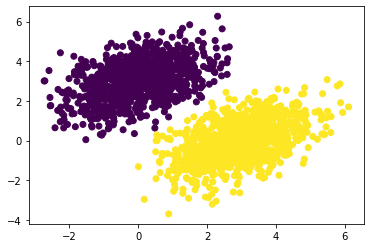

In [43]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:,0],inputs[:,1], c=targets[:,0])
plt.show()

In [78]:
input_dim=2
output_dim=1
W=tf.Variable(initial_value=tf.random.uniform((input_dim,output_dim)))
b=tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))
print(W,b)

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[0.5365988],
       [0.8323996]], dtype=float32)> <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [48]:
def model(inputs):
    return tf.matmul(inputs,W)+b

In [69]:
def square_loss(targets,predictions):
    per_sample_loss=tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_loss)

In [73]:
learning_rate=0.1
def training_step(inputs,targets):
    with tf.GradientTape() as tape:
        predictions=model(inputs)
        loss= square_loss(targets,predictions)
        tape.watch(loss)
    grad_loss_wrt_W,grad_loss_wrt_b= tape.gradient(loss,[W,b])
    #print(grad_loss_wrt_W,grad_loss_wrt_b)
    W.assign_sub(grad_loss_wrt_W*learning_rate)
    b.assign_sub(grad_loss_wrt_b*learning_rate)
    return loss

In [74]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 5.1811
Loss at step 1: 0.4054
Loss at step 2: 0.1600
Loss at step 3: 0.1233
Loss at step 4: 0.1120
Loss at step 5: 0.1043
Loss at step 6: 0.0976
Loss at step 7: 0.0915
Loss at step 8: 0.0859
Loss at step 9: 0.0809
Loss at step 10: 0.0762
Loss at step 11: 0.0720
Loss at step 12: 0.0681
Loss at step 13: 0.0646
Loss at step 14: 0.0613
Loss at step 15: 0.0584
Loss at step 16: 0.0557
Loss at step 17: 0.0532
Loss at step 18: 0.0509
Loss at step 19: 0.0489
Loss at step 20: 0.0470
Loss at step 21: 0.0452
Loss at step 22: 0.0437
Loss at step 23: 0.0422
Loss at step 24: 0.0409
Loss at step 25: 0.0397
Loss at step 26: 0.0386
Loss at step 27: 0.0376
Loss at step 28: 0.0367
Loss at step 29: 0.0358
Loss at step 30: 0.0351
Loss at step 31: 0.0344
Loss at step 32: 0.0337
Loss at step 33: 0.0331
Loss at step 34: 0.0326
Loss at step 35: 0.0321
Loss at step 36: 0.0317
Loss at step 37: 0.0313
Loss at step 38: 0.0309
Loss at step 39: 0.0305


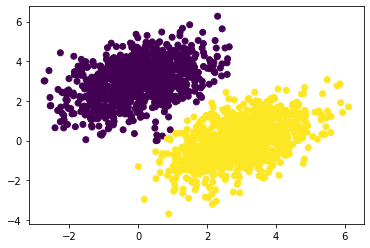

In [75]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

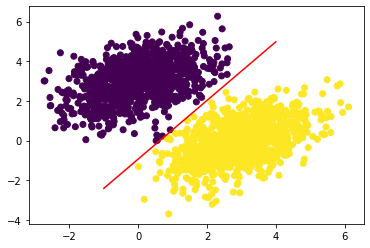

In [76]:
x = np.linspace(-1, 4, 100)                                          
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]                            
plt.plot(x, y, "-r")                                                 
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)